In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE


import joblib

from sklearn.datasets import fetch_openml


# **Load the Dataset**

In [120]:


df = pd.read_csv('phishing_url_website.csv')

In [121]:
df.head()

,URL,Domain,TLD,URLSimilarityIndex,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,Title,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasCopyrightInfo,NoOfImage,NoOfJS,NoOfSelfRef,label
0,https://www.southbankmosaics.com,www.southbankmosaics.com,com,100.0,1,0.032,1,558,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,1,0,0,1,1,34,28,119,1
1,https://www.uni-mainz.de,www.uni-mainz.de,de,100.0,2,0.087,1,618,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,0,0,1,1,1,50,8,39,1
2,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,100.0,2,0.069,1,467,voice fm southampton,46.666667,46.666667,1,1,0,1,1,10,7,42,1
3,https://www.globalreporting.org,www.globalreporting.org,org,100.0,1,0.033,1,1210,gri - home,0.000000,0.000000,1,1,1,0,1,35,11,86,1
4,https://www.nerdscandy.com,www.nerdscandy.com,com,100.0,1,0.040,1,514,nerds candy,100.000000,100.000000,1,1,1,1,1,24,22,36,1


# **Understand the Data**

In [122]:
print(df.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176262 entries, 0 to 176261
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         176262 non-null  object 
 1   Domain                      176262 non-null  object 
 2   TLD                         176262 non-null  object 
 3   URLSimilarityIndex          176262 non-null  float64
 4   NoOfOtherSpecialCharsInURL  176262 non-null  int64  
 5   SpacialCharRatioInURL       176262 non-null  float64
 6   IsHTTPS                     176262 non-null  int64  
 7   LineOfCode                  176262 non-null  int64  
 8   Title                       176262 non-null  object 
 9   DomainTitleMatchScore       176262 non-null  float64
 10  URLTitleMatchScore          176262 non-null  float64
 11  IsResponsive                176262 non-null  int64  
 12  HasDescription              176262 non-null  int64  
 13  HasSocialNet  

In [123]:

print(df.describe()) 

       URLSimilarityIndex  NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  \
count       176262.000000               176262.000000          176262.000000   
mean            81.888863                    1.906395               0.060528   
std             25.176279                    1.513070               0.029009   
min              5.206704                    1.000000               0.018000   
25%             63.706267                    1.000000               0.038000   
50%            100.000000                    1.000000               0.048000   
75%            100.000000                    2.000000               0.080000   
max            100.000000                   12.000000               0.160000   

             IsHTTPS     LineOfCode  DomainTitleMatchScore  \
count  176262.000000  176262.000000          176262.000000   
mean        0.790437     841.568909              51.784938   
std         0.406998    1257.005436              49.665737   
min         0.000000       2.00

In [124]:
print(df.shape)

(176262, 20)


In [125]:
print(df.isnull().sum())

URL                           0
Domain                        0
TLD                           0
URLSimilarityIndex            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
IsResponsive                  0
HasDescription                0
HasSocialNet                  0
HasSubmitButton               0
HasCopyrightInfo              0
NoOfImage                     0
NoOfJS                        0
NoOfSelfRef                   0
label                         0
dtype: int64


In [126]:
df_cleaned = df.dropna()

# **Visulize Target Variable**

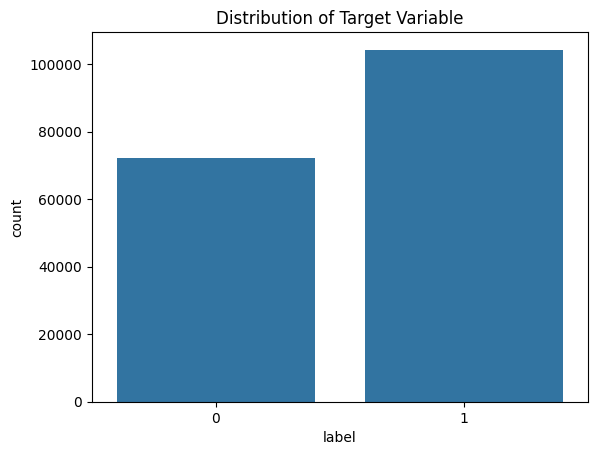

In [127]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# **Examine Features**

In [128]:
phishing_data = fetch_openml(name="PhishingWebsites", version=1, as_frame=True)
df = phishing_data.frame
print(df.head())  

  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                -1          1                  1                1   
1                 1          1                  1                1   
2                 1          0                  1                1   
3                 1          0                  1                1   
4                 1          0                 -1                1   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                       -1            -1                -1             -1   
1                        1            -1                 0              1   
2                        1            -1                -1             -1   
3                        1            -1                -1             -1   
4                        1            -1                 1              1   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                          -1       1

In [129]:
print(X.dtypes)  # Check data types


having_IP_Address              category
URL_Length                     category
Shortining_Service             category
having_At_Symbol               category
double_slash_redirecting       category
Prefix_Suffix                  category
having_Sub_Domain              category
SSLfinal_State                 category
Domain_registeration_length    category
Favicon                        category
port                           category
HTTPS_token                    category
Request_URL                    category
URL_of_Anchor                  category
Links_in_tags                  category
SFH                            category
Submitting_to_email            category
Abnormal_URL                   category
Redirect                       category
on_mouseover                   category
RightClick                     category
popUpWidnow                    category
Iframe                         category
age_of_domain                  category
DNSRecord                      category


In [130]:
from sklearn.preprocessing import LabelEncoder

# Example: Label encoding categorical columns
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [131]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [132]:
print("\nClass Distribution:")
print(df['Result'].value_counts()) 


Class Distribution:
Result
1     6157
-1    4898
Name: count, dtype: int64


# **Data Preprocessing**

In [ ]:
X = df.drop(columns=['Result'])                                                                                  # F
y = df['Result']                                                                                                    # T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nTraining Support Vector Machine...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)



Training Support Vector Machine...


In [134]:
print("\nSVM Classification Report:")
svm_class_report = classification_report(y_test, svm_predictions, output_dict=True)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
rf_class_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_accuracy = accuracy_score(y_test, rf_predictions)


SVM Classification Report:

Training Random Forest...

Random Forest Classification Report:


In [135]:
joblib.dump(svm_model, "svm_phishing_model.pkl")
joblib.dump(rf_model, "rf_phishing_model.pkl")

print("\nModels saved as 'svm_phishing_model.pkl' and 'rf_phishing_model.pkl'")


Models saved as 'svm_phishing_model.pkl' and 'rf_phishing_model.pkl'


In [136]:
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# number of predictions should match the number of samples in y_test
print(f"SVM Predictions Length: {len(svm_predictions)}")
print(f"RF Predictions Length: {len(rf_predictions)}")
print(f"y_test Length: {len(y_test)}")

# confusion matrix
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


SVM Predictions Length: 3317
RF Predictions Length: 3317
y_test Length: 3317

SVM Confusion Matrix:
[[1332  138]
 [ 107 1740]]

Random Forest Confusion Matrix:
[[1409   61]
 [  34 1813]]


In [137]:
print("\nConfusion Matrices:")
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
results = {
    'Metric': ['Accuracy', 'Precision (Phishing)', 'Recall (Phishing)', 'F1-Score (Phishing)',
               'Precision (Legitimate)', 'Recall (Legitimate)', 'F1-Score (Legitimate)'],
    'SVM': [
        svm_accuracy,
        svm_class_report['1']['precision'],
        svm_class_report['1']['recall'],
        svm_class_report['1']['f1-score'],
        svm_class_report['-1']['precision'],
        svm_class_report['-1']['recall'],
        svm_class_report['-1']['f1-score']
    ],
    'Random Forest': [
        rf_accuracy,
        rf_class_report['1']['precision'],
        rf_class_report['1']['recall'],
        rf_class_report['1']['f1-score'],
        rf_class_report['-1']['precision'],
        rf_class_report['-1']['recall'],
        rf_class_report['-1']['f1-score']
    ]
}

results_df = pd.DataFrame(results)

print("\nClassification Results:")
print(results_df)

print("\nSVM Confusion Matrix:")
print(svm_conf_matrix)

print("\nRandom Forest Confusion Matrix:")
print(rf_conf_matrix)


Confusion Matrices:

Classification Results:
                   Metric       SVM  Random Forest
0                Accuracy  0.926138       0.971360
1    Precision (Phishing)  0.926518       0.967449
2       Recall (Phishing)  0.942068       0.981592
3     F1-Score (Phishing)  0.934228       0.974469
4  Precision (Legitimate)  0.925643       0.976438
5     Recall (Legitimate)  0.906122       0.958503
6   F1-Score (Legitimate)  0.915779       0.967388

SVM Confusion Matrix:
[[1332  138]
 [ 107 1740]]

Random Forest Confusion Matrix:
[[1409   61]
 [  34 1813]]


In [138]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

svm_probabilities = svm_model.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probabilities)
print(f"SVM ROC AUC: {svm_auc:.2f}")

SVM ROC AUC: 0.98


In [139]:
# SVM Confusion Matrix values
svm_TP = 1740  
svm_TN = 1332  
svm_FP = 138   
svm_FN = 107   

# Random Forest Confusion Matrix values
rf_TP = 1813  
rf_TN = 1409  
rf_FP = 61    
rf_FN = 34    

svm_accuracy = (svm_TP + svm_TN) / (svm_TP + svm_TN + svm_FP + svm_FN)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

rf_accuracy = (rf_TP + rf_TN) / (rf_TP + rf_TN + rf_FP + rf_FN)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


SVM Accuracy: 92.61%
Random Forest Accuracy: 97.14%


# **confusion matrix for SVM**

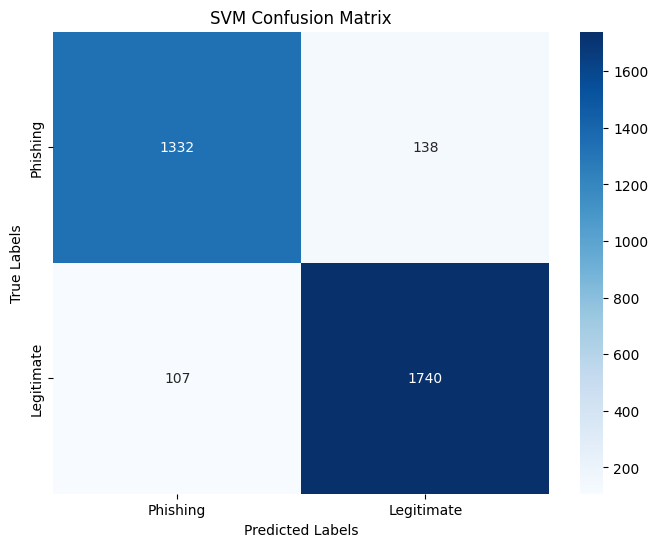

In [140]:

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])
plt.title("SVM Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

# **confusion matrix for Random Forest**

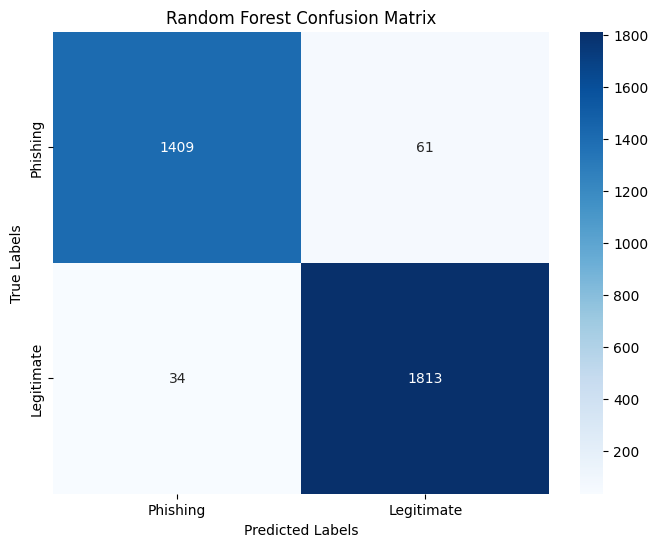

In [141]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Blues", xticklabels=["Phishing", "Legitimate"], yticklabels=["Phishing", "Legitimate"])
plt.title("Random Forest Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

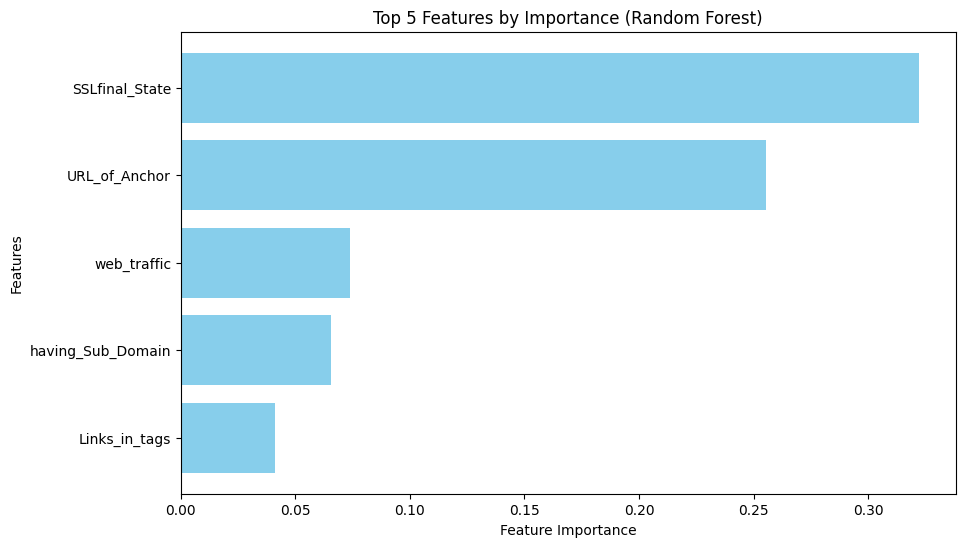

In [142]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 5 features
top_features = importance_df.head(5)

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Features by Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()